In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

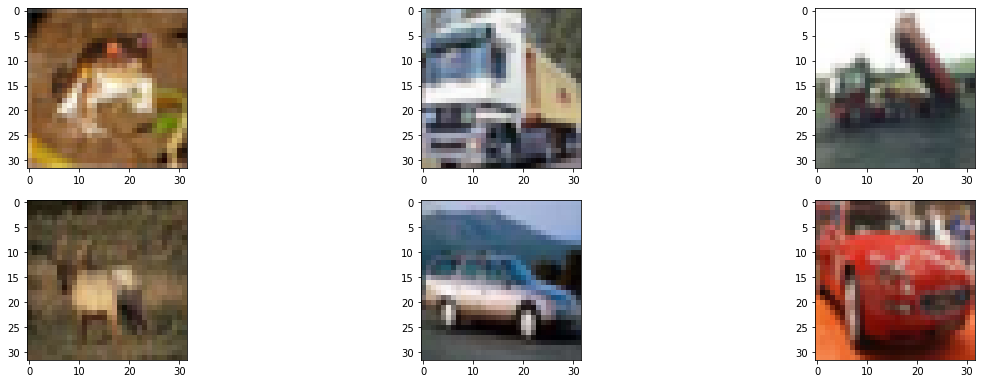

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
#from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [4]:
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same',activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
import tensorflow as tf
sgd=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\Ajay\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [9]:
model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 328s 203ms/step - loss: 1.7291 - accuracy: 0.3729 - val_loss: 1.4055 - val_accuracy: 0.4890
Epoch 2/10
1563/1563 [==============================] - 303s 194ms/step - loss: 1.3497 - accuracy: 0.5152 - val_loss: 1.1946 - val_accuracy: 0.5804
Epoch 3/10
1563/1563 [==============================] - 302s 194ms/step - loss: 1.1886 - accuracy: 0.5768 - val_loss: 1.1136 - val_accuracy: 0.6065
Epoch 4/10
1563/1563 [==============================] - 301s 193ms/step - loss: 1.0763 - accuracy: 0.6166 - val_loss: 1.0526 - val_accuracy: 0.6263
Epoch 5/10
1563/1563 [==============================] - 310s 199ms/step - loss: 0.9921 - accuracy: 0.6475 - val_loss: 1.0177 - val_accuracy: 0.6417
Epoch 6/10
1563/1563 [==============================] - 306s 196ms/step - loss: 0.9088 - accuracy: 0.6798 - val_loss: 0.9753 - val_accuracy: 0.6573
Epoch 7/10
1563/1563 [==============================] - 310s 198ms/step - loss: 0.8474 - accuracy: 0.6988 - val_

In [10]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 13s 40ms/step - loss: 0.9212 - accuracy: 0.6817
68.16999912261963


In [11]:
model.save("model1_cifar_10epoch.h5")

automobile


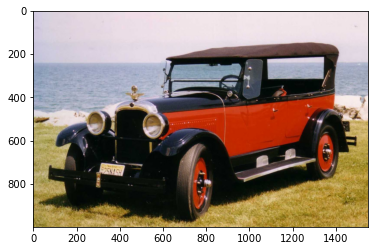

In [13]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("auto.jpg")

plt.imshow(im)
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred_x=model.predict(im) 
classes_x=np.argmax(pred_x,axis=1)
print(results[np.argmax(pred_x)])